In [1]:
import pandas as pd

In [37]:
df = pd.read_excel("sensitivity_poging2_vensim.xlsx")
df

,Parameter,Value,Coconut farm[Small],Coconut farm[Medium],Coconut farm[Large],Maize farm[Small],Maize farm[Medium],Maize farm[Large],Migrated households,Rice farm[Small],Rice farm[Medium],Rice farm[Large],"Shrimp farm[Small,Without disease]","Shrimp farm[Small,With disease]","Shrimp farm[Medium,Without disease]","Shrimp farm[Medium,With disease]","Shrimp farm[Large,Without disease]","Shrimp farm[Large,With disease]",Migration rate
0,NaN,NaN,2.577250,23.43510,5.84858,16.968400,5.19203,0.197287,64.5771,8.725790,8.66404,1.85955,0.654014,0.558373,0.169914,0.134352,1.02513,0.011096,0.741692
1,Fixed crop costs/ha[Rice],4.381440e+05,1.263990,7.42537,2.22594,8.580580,1.18372,0.197287,45.3893,36.280200,29.10400,5.52895,0.396903,0.340066,0.035099,0.014588,1.01493,0.002477,0.818443
2,Fixed crop costs/ha[Rice],5.783850e+06,1.263990,6.97443,2.22594,8.580580,8.85652,0.197287,46.0290,36.280200,21.23320,5.52895,0.396903,0.340066,0.299002,0.259729,1.01493,0.002477,0.815884
3,Fixed crop costs/ha[Rice],1.341420e+07,2.028020,14.36110,3.92352,14.099400,7.32625,0.197287,56.7074,19.643400,15.46660,3.76442,0.633957,0.541061,0.245128,0.207951,1.02513,0.020645,0.773171
4,Fixed crop costs/ha[Rice],1.792090e+07,1.735520,24.14230,6.34838,11.178600,4.95175,0.197287,77.5835,2.605910,8.22626,4.43909,0.546035,0.439896,0.161849,0.127632,1.02427,0.014408,0.689666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,Machines,5.563790e-01,0.354726,24.14230,6.45874,0.398159,4.95175,0.197287,92.6107,0.182109,8.22626,3.11133,0.054201,0.009657,0.161849,0.127632,1.02427,0.016276,0.629557
1897,Machines,2.015870e-01,2.577250,23.43510,5.84858,16.968400,5.19203,0.197287,64.5771,8.725790,8.66404,1.85955,0.654014,0.558373,0.169914,0.134352,1.02513,0.011096,0.741692
1898,Machines,4.789840e-01,2.577250,23.43510,5.84858,16.968400,5.19203,0.197287,64.5771,8.725790,8.66404,1.85955,0.654014,0.558373,0.169914,0.134352,1.02513,0.011096,0.741692
1899,Machines,1.595560e-01,2.577250,23.43510,5.84858,16.968400,5.19203,0.197287,64.5771,8.725790,8.66404,1.85955,0.654014,0.558373,0.169914,0.134352,1.02513,0.011096,0.741692


In [35]:
df['Parameter'].value_counts().sum

<bound method Series.sum of Parameter
Self agri workers[Coconut,Large]          200
Fixed crop costs/ha[Rice]                 100
Fixed crop costs/ha[Maize]                100
Fixed crop costs/ha[Coconut]              100
Wage worker salary / day[Low skilled]     100
fixed shrimp costs                        100
Self agri workers[Rice,Small]             100
Self agri workers[Rice,Medium]            100
Self agri workers[Rice,Large]             100
Wage worker salary / day[High skilled]    100
Self agri workers[Coconut,Small]          100
Self agri workers[Coconut,Medium]         100
Self agri workers[Maize,Small]            100
Self agri workers[Maize,Medium]           100
Self agri workers[Maize,Large]            100
Education level                           100
Percentage population high skilled        100
Machines                                  100
Name: count, dtype: int64>

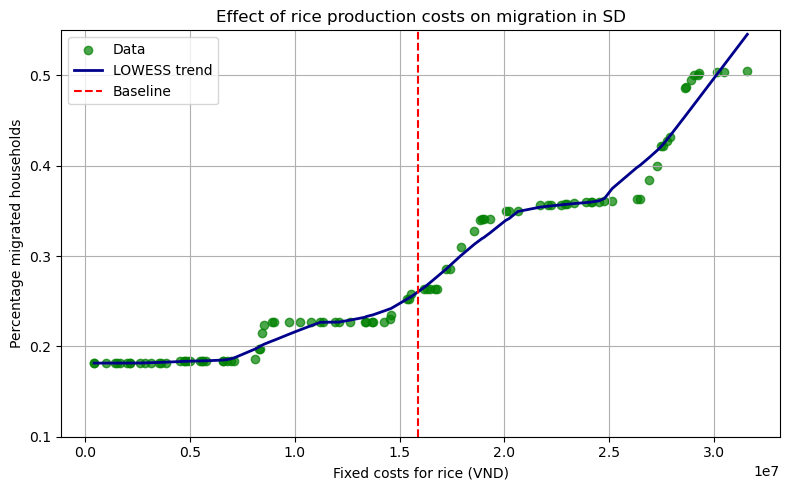

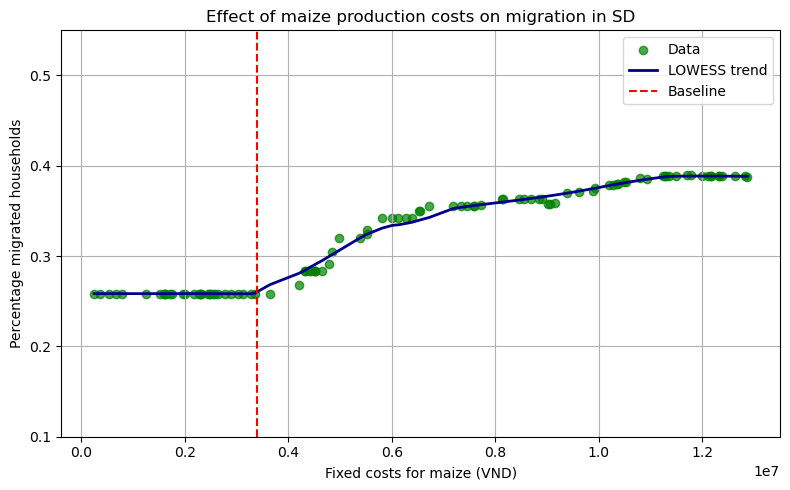

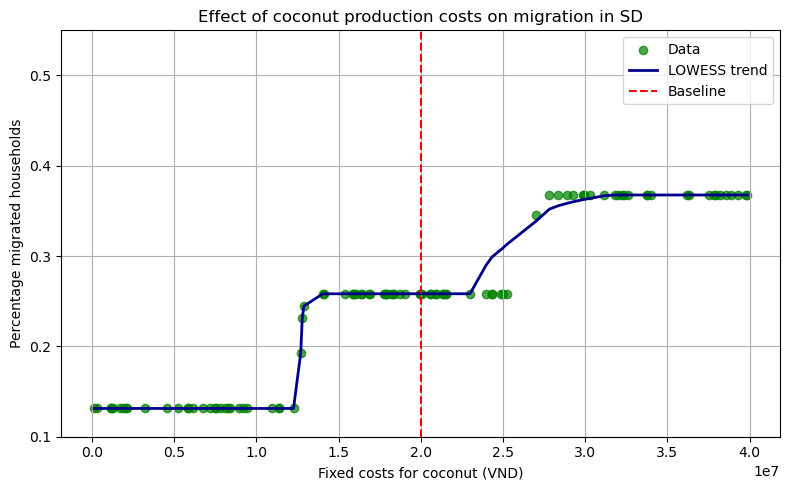

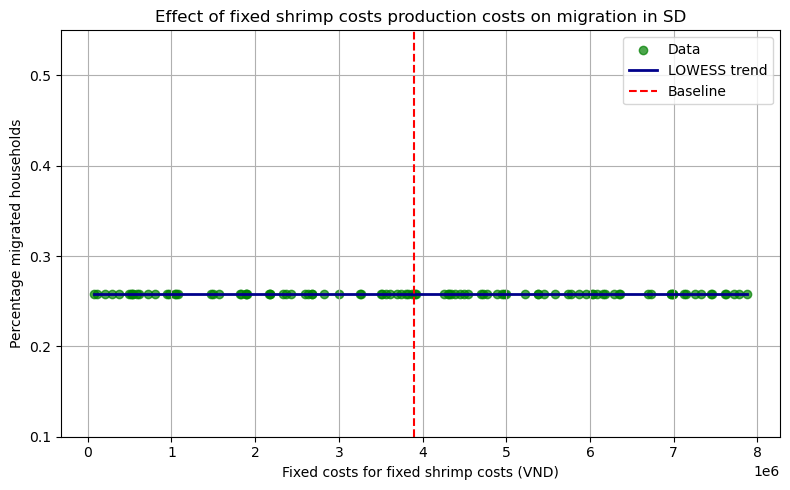

In [115]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

params_to_plot = [
    ("Fixed crop costs/ha[Rice]", 15900000),
    ("Fixed crop costs/ha[Maize]", 3400000),
    ("Fixed crop costs/ha[Coconut]", 20000000),
    ("fixed shrimp costs", 3900000)  # Pas deze waarde aan indien nodig
]

for param, vline in params_to_plot:
    subset = df[df["Parameter"] == param]

    x = subset["Value"]
    y = 1 - subset["Migration rate"]  # Omkeren naar percentage niet-gemigreerd

    plt.figure(figsize=(8,5))

    # Scatterplot groene stippen
    plt.scatter(x, y, alpha=0.7, color="green", label="Data")

    # LOWESS smoothing en plot donkerblauwe lijn
    lowess = sm.nonparametric.lowess
    smoothed = lowess(y, x, frac=0.2)
    plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

    # Verticale rode stippellijn
    plt.axvline(x=vline, color='red', linestyle='--', linewidth=1.5, label = "Baseline")

    import re
    match = re.search(r"\[(.*?)\]", param)
    title_text = match.group(1).lower() if match else param.lower()
    plt.title(f"Effect of {title_text} production costs on migration in SD")
    plt.xlabel(f"Fixed costs for {title_text} (VND)")
    plt.ylabel("Percentage migrated households")
    plt.ylim(0.1, 0.55)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


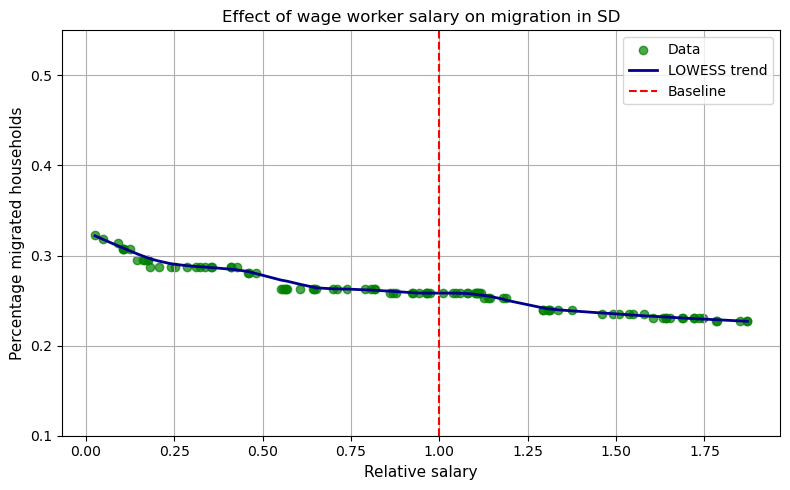

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Filter op de juiste parameter
subset = df[df["Parameter"] == "Wage worker salary / day[Low skilled]"]

# Zet x-waarden om naar percentage t.o.v. baseline (200.000 VND)
x = subset["Value"] / 200000  # 1.0 = 200.000
y = 1 - subset["Migration rate"]  # Omgekeerd: percentage niet gemigreerd

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="green", alpha=0.7, label="Data")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)
plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

# Verticale rode lijn bij baseline (1.0 = 100%)
plt.axvline(x=1.0, color='red', linestyle='--', linewidth=1.5, label="Baseline")

# Labels en stijl
plt.xlabel("Relative salary", fontsize=11)
plt.ylabel("Percentage migrated households", fontsize=11)
plt.title("Effect of wage worker salary on migration in SD", fontsize=12)
plt.ylim(0.1, 0.55)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


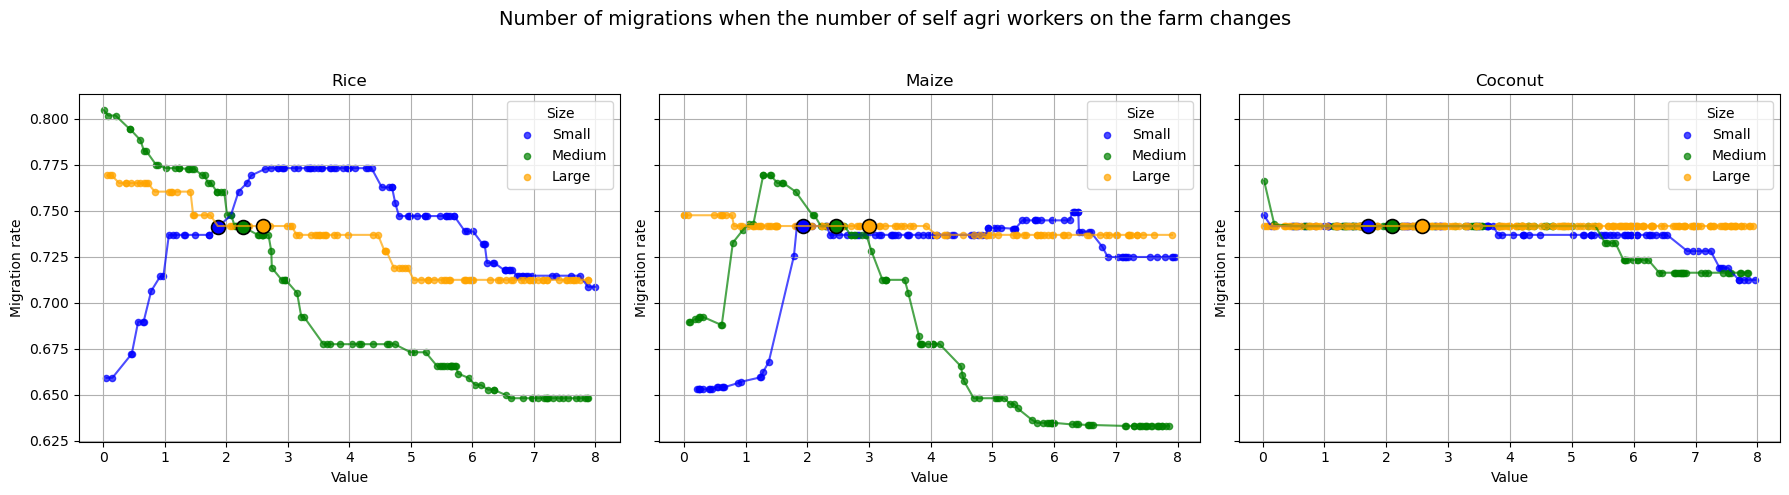

In [73]:
import numpy as np
import matplotlib.pyplot as plt

sizes = ['Small', 'Medium', 'Large']
colors = ['blue', 'green', 'orange']

points_positions = {
    'Rice': {'Small': 1.86, 'Medium': 2.27, 'Large': 2.59},
    'Maize': {'Small': 1.93, 'Medium': 2.46, 'Large': 3.00},
    'Coconut': {'Small': 1.7, 'Medium': 2.1, 'Large': 2.57}
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, crop_type in zip(axes, ['Rice', 'Maize', 'Coconut']):
    for size, color in zip(sizes, colors):
        param_name = f'Self agri workers[{crop_type},{size}]'
        subset = df[df['Parameter'] == param_name]
        x = subset['Value']
        y = subset['Migration rate']

        sorted_indices = np.argsort(x)
        x_sorted = x.iloc[sorted_indices]
        y_sorted = y.iloc[sorted_indices]

        ax.scatter(x, y, s=20, color=color, alpha=0.7, label=size)
        ax.plot(x_sorted, y_sorted, color=color, alpha=0.7)

        x_point = points_positions[crop_type][size]
        if x_point < x_sorted.min() or x_point > x_sorted.max():
            continue
        y_point = np.interp(x_point, x_sorted, y_sorted)

        # Marker met dezelfde kleur als lijn, zwarte rand voor zichtbaarheid
        ax.plot(x_point, y_point, 'o', color=color, markersize=10, markeredgecolor='black', markeredgewidth=1.2)

    ax.set_title(crop_type.capitalize())
    ax.set_xlabel('Value')
    ax.set_ylabel('Migration rate')
    ax.grid(True)
    ax.legend(title='Size')

fig.suptitle("Number of migrations when the number of self agri workers on the farm changes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


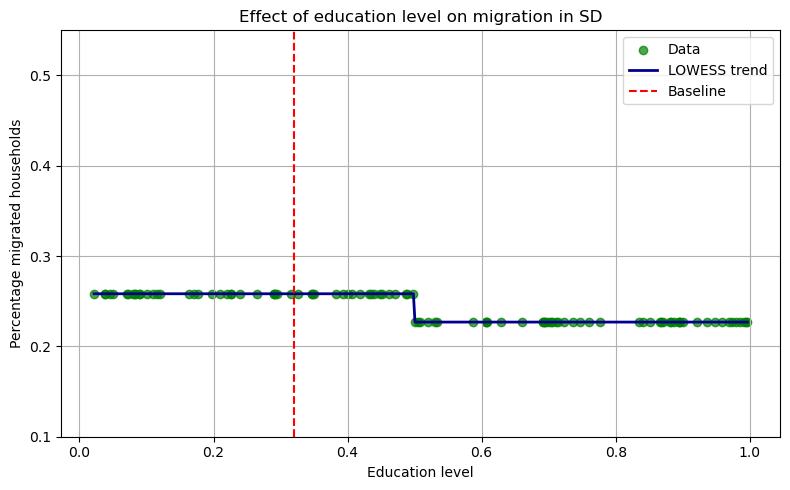

In [117]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

subset = df[df["Parameter"] == "Education level"]

x = subset["Value"]
y = 1 - subset["Migration rate"]  # Omgekeerd: percentage niet gemigreerd

plt.figure(figsize=(8,5))
plt.scatter(x, y, color="green", alpha=0.7, label="Data")

# LOWESS smoothing en plot
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)
plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

# Verticale rode lijn
plt.axvline(x=0.32, color='red', linestyle='--', linewidth=1.5, label = "Baseline")

plt.xlabel("Education level")
plt.ylabel("Percentage migrated households")
plt.title("Effect of education level on migration in SD")
plt.ylim(0.1, 0.55)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


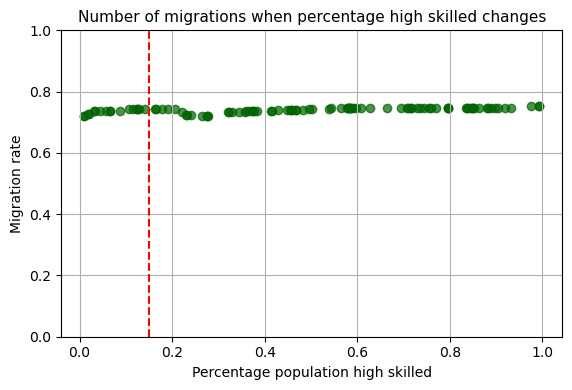

In [83]:
# Filter de juiste parameter
subset = df[df["Parameter"] == "Percentage population high skilled"]

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(subset["Value"], subset["Migration rate"], color="darkgreen", alpha=0.7)

# Verticale lijn bij 200000 VND
plt.axvline(x=0.15, color='red', linestyle='--', linewidth=1.5)

# Labels en stijl
plt.xlabel("Percentage population high skilled", fontsize=10)
plt.ylabel("Migration rate", fontsize=10)
plt.title("Number of migrations when percentage high skilled changes", fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.ylim(0,1)
plt.show()

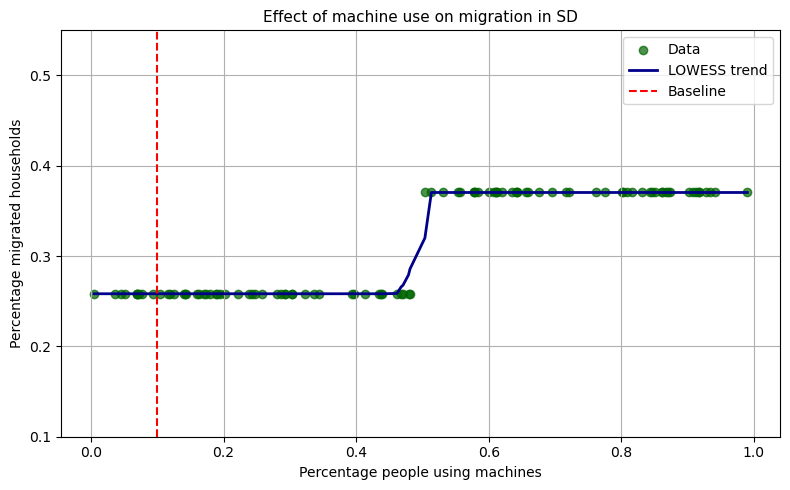

In [118]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Filter de juiste parameter
subset = df[df["Parameter"] == "Machines"]

x = subset["Value"]
y = 1 - subset["Migration rate"]  # 1 - migratiepercentage

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.2)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="darkgreen", alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color="darkblue", linewidth=2, label="LOWESS trend")

# Verticale lijn bij 0.1 (10%)
plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1.5, label = "Baseline")

# Labels en stijl
plt.xlabel("Percentage people using machines", fontsize=10)
plt.ylabel("Percentage migrated households", fontsize=10)
plt.title("Effect of machine use on migration in SD", fontsize=11)
plt.grid(True)
plt.ylim(0.1, 0.55)
plt.legend()
plt.tight_layout()
plt.show()


In [127]:
df = pd.read_excel("19juni2025.xlsx", header=None)

In [128]:
df 

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,Time,Year,2014.000,2014.500000,2015.000000,2015.500000,2016.000000,2016.500000,2017.000000,2017.500000,...,2035.500000,2036.000000,2036.500000,2037.000000,2037.500000,2038.000000,2038.500000,2039.000000,2039.500000,2040.000000
1,Agri wage,household,3.000,2.992500,2.985019,2.977556,2.970112,2.962687,2.955280,2.947892,...,2.693867,2.687132,2.680414,2.673713,2.667029,2.660362,2.653711,2.647076,2.640459,2.633858
2,Agri wage migrates,household/Year,0.015,0.014962,0.014925,0.014888,0.014851,0.014813,0.014776,0.014739,...,0.013469,0.013436,0.013402,0.013369,0.013335,0.013302,0.013269,0.013235,0.013202,0.013169
3,Antibiotic costs[Without disease],vnd,1000000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Antibiotic costs[With disease],vnd,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,World market price[Maize],vnd/kg,6900.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,World market price shrimp,vnd/kg,385542.000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,...,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000,385542.000000
348,Yield loss ratio[Rice],dml,0.000,0.000000,0.000000,0.120000,0.240000,0.120000,0.000000,0.000000,...,0.120000,0.000000,0.000000,0.000000,0.120000,0.240000,0.120000,0.000000,0.000000,0.000000
349,Yield loss ratio[Coconut],dml,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df = df.set_index(0).transpose()

# df = df.reset_index()
df

,Time,Agri wage,Agri wage migrates,Antibiotic costs[Without disease],Antibiotic costs[With disease],Available number of wage workers,Average landless hh savings,Average savings non agri,Average shrimp farm profits[Small],Average shrimp farm profits[Medium],...,"""Worked self non agri (service)""[Maize,Medium]","""Worked self non agri (service)""[Maize,Large]",Working force within a household,World market price[Rice],World market price[Coconut],World market price[Maize],World market price shrimp,Yield loss ratio[Rice],Yield loss ratio[Coconut],Yield loss ratio[Maize]
1,Year,household,household/Year,vnd,vnd,people,NaN,NaN,NaN,NaN,...,NaN,NaN,people/household,vnd/kg,vnd/kg,vnd/kg,vnd/kg,dml,dml,dml
2,2014.0,3.0,0.015,1000000.0,0.0,247.029999,10000000.0,10000000.0,25037940.0,75113820.0,...,0.16,0.0,2.0,6049.0,17500.0,6900.0,385542.0,0.0,0.0,0.156
3,2014.5,2.9925,0.014962,NaN,NaN,247.445999,15383621.635393,15473728.651079,24268632.594046,75113820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
4,2015.0,2.985019,0.014925,NaN,NaN,247.747765,20855140.293186,21049839.696962,23741373.412652,75113820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
5,2015.5,2.977556,0.014888,NaN,NaN,247.960153,26398448.630204,26707842.30944,23366657.650342,75113820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.12,NaN,0.276
6,2016.0,2.970112,0.014851,NaN,NaN,247.695376,31991836.874244,32431367.065591,22498579.785358,74162365.539787,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.24,NaN,0.396
7,2016.5,2.962687,0.014813,NaN,NaN,247.601122,37677358.149827,38324207.87621,21827442.061732,73272329.484346,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.12,NaN,0.276
8,2017.0,2.95528,0.014776,NaN,NaN,244.71291,43474914.144297,44381105.218857,21288374.787307,72437831.496103,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
9,2017.5,2.947892,0.014739,NaN,NaN,242.250316,49455796.58778,50775983.853192,21068326.929221,72437954.855784,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
10,2018.0,2.940522,0.014703,NaN,NaN,239.956045,55574093.829676,57421603.147234,20905604.089738,72438078.216587,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156


In [130]:
for column in df.columns:
    print(column)

Time
Agri wage
Agri wage migrates
Antibiotic costs[Without disease]
Antibiotic costs[With disease]
Available number of wage workers
Average landless hh savings
Average savings non agri
Average shrimp farm profits[Small]
Average shrimp farm profits[Medium]
Average shrimp farm profits[Large]
average shrimp farm savings[Small]
average shrimp farm savings[Medium]
average shrimp farm savings[Large]
Average wage worker income
Base income for non agri households[Low skilled]
Base income for non agri households[High skilled]
Base income for service workers
Chance farmer changes crops[Rice,Small]
Chance farmer changes crops[Rice,Medium]
Chance farmer changes crops[Rice,Large]
Chance farmer changes crops[Coconut,Small]
Chance farmer changes crops[Coconut,Medium]
Chance farmer changes crops[Coconut,Large]
Chance farmer changes crops[Maize,Small]
Chance farmer changes crops[Maize,Medium]
Chance farmer changes crops[Maize,Large]
Chance farmer stops farming[Rice,Small]
Chance farmer stops farming[Ri

In [ ]:
df = df.fillna(0)|


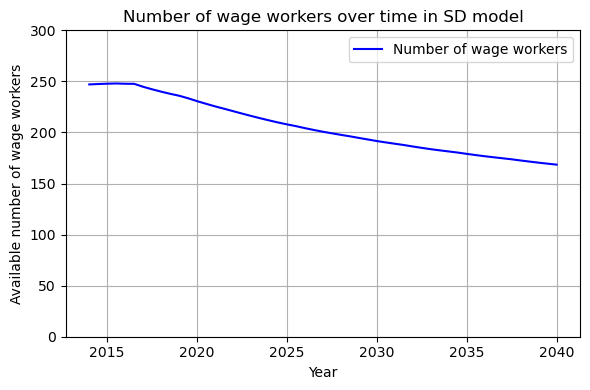

In [131]:
import matplotlib.pyplot as plt

# Zorg dat de 'Time' en 'Available number of wage workers' kolommen numeriek zijn
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Available number of wage workers'] = pd.to_numeric(df['Available number of wage workers'], errors='coerce')

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Available number of wage workers'], label='Number of wage workers', color='blue')
plt.xlabel('Year')
plt.ylabel('Available number of wage workers')
plt.title('Number of wage workers over time in SD model')
plt.grid(True)
plt.legend()
plt.ylim(0, 300)  # Draai de y-as om van 2100 naar 0
plt.tight_layout()
plt.show()


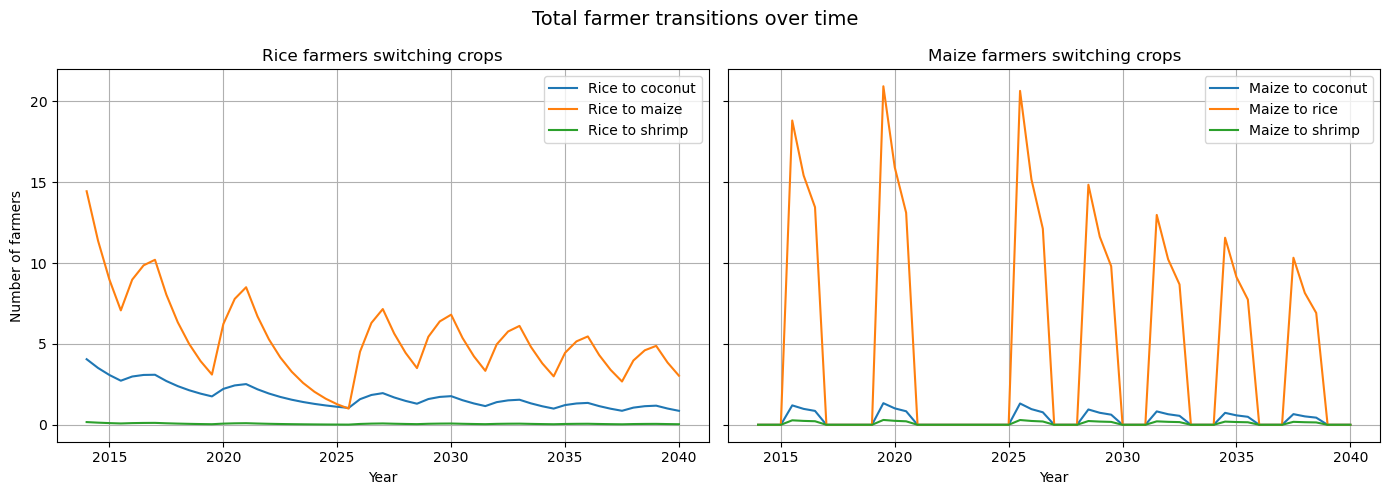

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Zorg dat Time numeriek is
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Alleen geldige transities
transitions_rice = ['coconut', 'maize', 'shrimp']
transitions_maize = ['coconut', 'rice', 'shrimp']

# Dataframes om transities op te slaan
rice_transitions = {}
maize_transitions = {}

# Rice farmer transities
for t in transitions_rice:
    cols = [f'Rice farmer starts {t}[{size}]' for size in ['Small', 'Medium', 'Large']]
    for col in cols:
        df[col] = pd.to_numeric(df.get(col, 0), errors='coerce').fillna(0)
    rice_transitions[t] = df[cols].sum(axis=1)

# Maize farmer transities
for t in transitions_maize:
    cols = [f'Maize farmer starts {t}[{size}]' for size in ['Small', 'Medium', 'Large']]
    for col in cols:
        df[col] = pd.to_numeric(df.get(col, 0), errors='coerce').fillna(0)
    maize_transitions[t] = df[cols].sum(axis=1)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Rice farmers
for t in transitions_rice:
    axes[0].plot(df['Time'], rice_transitions[t], label=f"Rice to {t}")
axes[0].set_title("Rice farmers switching crops")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Number of farmers")
axes[0].grid(True)
axes[0].legend()

# Maize farmers
for t in transitions_maize:
    axes[1].plot(df['Time'], maize_transitions[t], label=f"Maize to {t}")
axes[1].set_title("Maize farmers switching crops")
axes[1].set_xlabel("Year")
axes[1].grid(True)
axes[1].legend()

plt.suptitle("Total farmer transitions over time", fontsize=14)
plt.tight_layout()
plt.show()


In [133]:
df["Average wage worker income"]

1         vnd/people
2     1660656.665814
3     1635538.793375
4     1611894.037593
5     1132777.877814
6      668043.691482
7     1103480.897188
8     1543729.652577
9     1540306.444469
10    1536294.162713
11    1531499.931827
12    1525838.989619
13    1088657.914349
14     653180.005703
15    1085058.600393
16    1514765.194872
17    1512927.823998
18    1511866.769817
19    1511266.591755
20     1510670.88986
21    1509935.711697
22    1508981.695516
23    1507774.999015
24    1505945.311864
25    1074800.781724
26     645502.994379
27    1071327.551774
28    1494783.556871
29     1493116.75982
30    1491731.757463
31    1066723.568759
32     642654.825552
33    1063195.619634
34    1481736.568014
35     1480731.29319
36    1479691.876794
37    1060035.968844
38     641130.103669
39    1057462.842295
40    1471577.977715
41    1470756.535051
42    1469959.249594
43     1054945.79797
44      640379.49537
45    1052655.696334
46    1462960.911707
47    1462770.812244
48    1462689

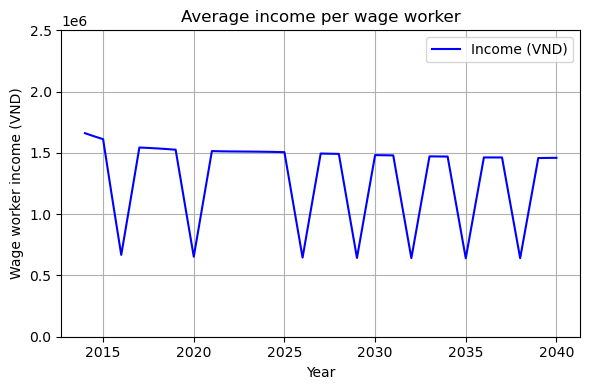

In [134]:
# Zorg dat de 'Time' en 'Available number of wage workers' kolommen numeriek zijn
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Average wage worker income'] = pd.to_numeric(df['Average wage worker income'], errors='coerce')

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Average wage worker income'], label='Income (VND)', color='blue')
plt.xlabel('Year')
plt.ylabel('Wage worker income (VND)')
plt.title('Average income per wage worker')
plt.grid(True)
plt.legend()
plt.ylim(0, 2.5e6)  # Draai de y-as om van 2100 naar 0
plt.tight_layout()
plt.show()


In [135]:
df.head()

,Time,Agri wage,Agri wage migrates,Antibiotic costs[Without disease],Antibiotic costs[With disease],Available number of wage workers,Average landless hh savings,Average savings non agri,Average shrimp farm profits[Small],Average shrimp farm profits[Medium],...,"""Worked self non agri (service)""[Maize,Medium]","""Worked self non agri (service)""[Maize,Large]",Working force within a household,World market price[Rice],World market price[Coconut],World market price[Maize],World market price shrimp,Yield loss ratio[Rice],Yield loss ratio[Coconut],Yield loss ratio[Maize]
1,NaN,household,household/Year,vnd,vnd,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,people/household,vnd/kg,vnd/kg,vnd/kg,vnd/kg,dml,dml,dml
2,2014.0,3.0,0.015,1000000.0,0.0,247.029999,10000000.0,10000000.0,25037940.0,75113820.0,...,0.16,0.0,2.0,6049.0,17500.0,6900.0,385542.0,0.0,0.0,0.156
3,2014.5,2.9925,0.014962,NaN,NaN,247.445999,15383621.635393,15473728.651079,24268632.594046,75113820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
4,2015.0,2.985019,0.014925,NaN,NaN,247.747765,20855140.293186,21049839.696962,23741373.412652,75113820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.0,NaN,0.156
5,2015.5,2.977556,0.014888,NaN,NaN,247.960153,26398448.630204,26707842.30944,23366657.650342,75113820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,385542.0,0.12,NaN,0.276


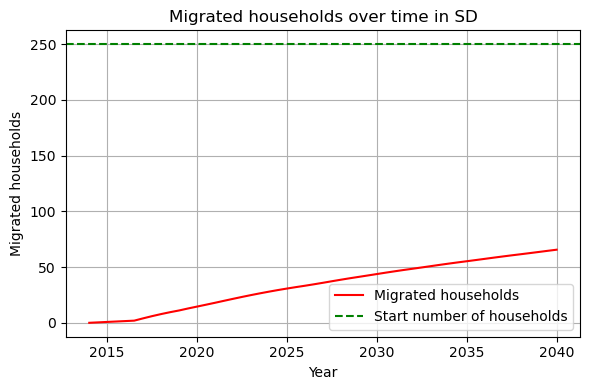

In [136]:
# Zorg dat de kolommen numeriek zijn en NaN's vervangen door 0
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Migrated households'] = pd.to_numeric(df['Migrated households'], errors='coerce').fillna(0)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(df['Time'], df['Migrated households'], label='Migrated households', color='red')
plt.axhline(y=250, color='green', linestyle='--', label='Start number of households')
plt.xlabel('Year')
plt.ylabel('Migrated households')
plt.title('Migrated households over time in SD')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


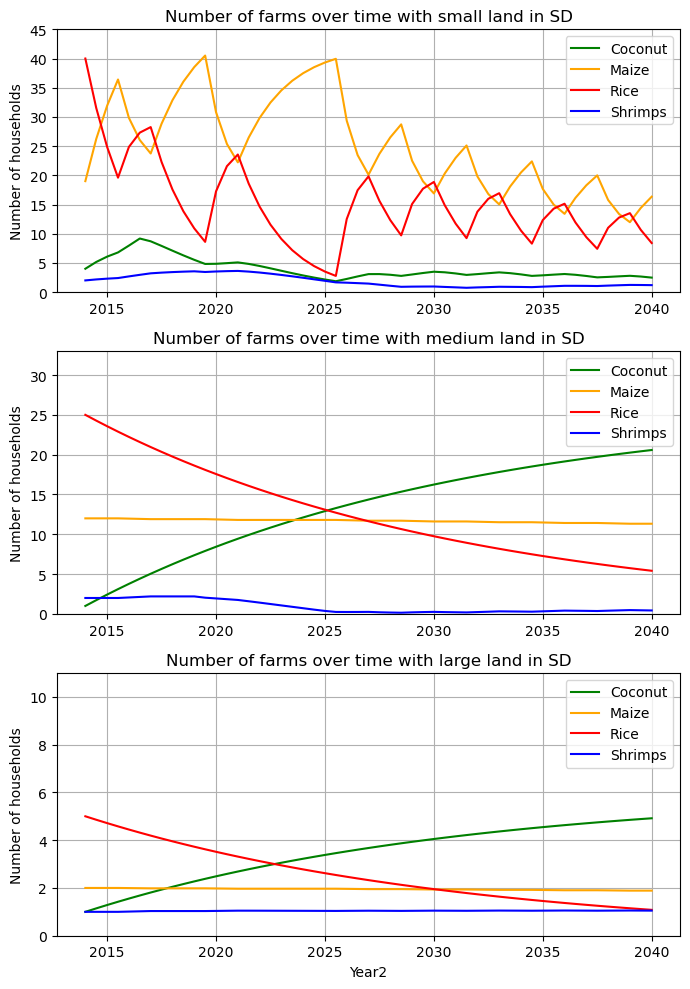

In [137]:
fig, axs = plt.subplots(3, 1, figsize=(7,10))
df['Coconut farm[Small]'] = pd.to_numeric(df['Coconut farm[Small]'], errors='coerce').fillna(0)
df['Maize farm[Small]'] = pd.to_numeric(df['Maize farm[Small]'], errors='coerce').fillna(0)
df['Rice farm[Small]'] = pd.to_numeric(df['Rice farm[Small]'], errors='coerce').fillna(0)
df['Coconut farm[Medium]'] = pd.to_numeric(df['Coconut farm[Medium]'], errors='coerce').fillna(0)
df['Maize farm[Medium]'] = pd.to_numeric(df['Maize farm[Medium]'], errors='coerce').fillna(0)
df['Rice farm[Medium]'] = pd.to_numeric(df['Rice farm[Medium]'], errors='coerce').fillna(0)
df['Coconut farm[Large]'] = pd.to_numeric(df['Coconut farm[Large]'], errors='coerce').fillna(0)
df['Maize farm[Large]'] = pd.to_numeric(df['Maize farm[Large]'], errors='coerce').fillna(0)
df['Rice farm[Large]'] = pd.to_numeric(df['Rice farm[Large]'], errors='coerce').fillna(0)
df['Shrimps[Small]'] = pd.to_numeric(df['Shrimp farm[Small,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Small,With disease]'], errors='coerce').fillna(0)
df['Shrimps[Medium]'] = pd.to_numeric(df['Shrimp farm[Medium,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Medium,With disease]'], errors='coerce').fillna(0)
df['Shrimps[Large]'] = pd.to_numeric(df['Shrimp farm[Large,Without disease]'], errors='coerce').fillna(0) + pd.to_numeric(df['Shrimp farm[Large,With disease]'], errors='coerce').fillna(0)

# Kleine landpercelen
axs[0].plot(df['Time'], df['Coconut farm[Small]'], label='Coconut', color='green')
axs[0].plot(df['Time'], df['Maize farm[Small]'], label='Maize', color='orange')
axs[0].plot(df['Time'], df['Rice farm[Small]'], label='Rice', color='red')
axs[0].plot(df['Time'], df['Shrimps[Small]'], label='Shrimps', color='blue')
axs[0].set_title('Number of farms over time with small land in SD')
axs[0].set_ylabel('Number of households')
axs[0].grid(True)
axs[0].set_ylim(0, 45)
axs[0].legend()

# Middelgrote landpercelen
axs[1].plot(df['Time'], df['Coconut farm[Medium]'], label='Coconut', color='green')
axs[1].plot(df['Time'], df['Maize farm[Medium]'], label='Maize', color='orange')
axs[1].plot(df['Time'], df['Rice farm[Medium]'], label='Rice', color='red')
axs[1].plot(df['Time'], df['Shrimps[Medium]'], label='Shrimps', color='blue')
axs[1].set_title('Number of farms over time with medium land in SD')
axs[1].set_ylabel('Number of households')
axs[1].legend()
axs[1].set_ylim(0, 33)
axs[1].grid(True)

# Grote landpercelen
axs[2].plot(df['Time'], df['Coconut farm[Large]'], label='Coconut', color='green')
axs[2].plot(df['Time'], df['Maize farm[Large]'], label='Maize', color='orange')
axs[2].plot(df['Time'], df['Rice farm[Large]'], label='Rice', color='red')
axs[2].plot(df['Time'], df['Shrimps[Large]'], label='Shrimps', color='blue')
axs[2].set_title('Number of farms over time with large land in SD')
axs[2].set_xlabel('Year2')
axs[2].set_ylabel('Number of households')
axs[2].legend()
axs[2].set_ylim(0, 11)

plt.tight_layout()
plt.grid(True)
plt.show()


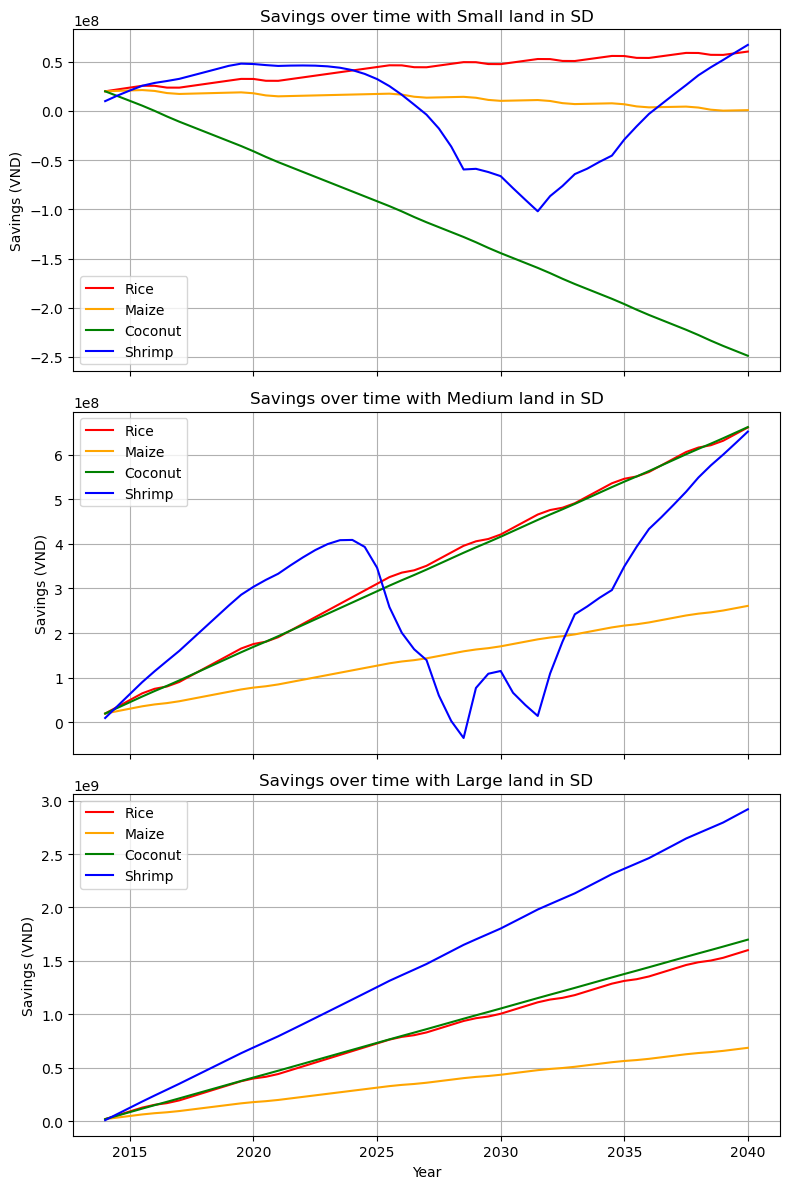

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

# Zorg dat df al geladen is

savings_columns = {
    'Small': {
        'Rice': '"Savings/farm"[Rice,Small]',
        'Maize': '"Savings/farm"[Maize,Small]',
        'Coconut': '"Savings/farm"[Coconut,Small]',
        'Shrimp': 'average shrimp farm savings[Small]'
    },
    'Medium': {
        'Rice': '"Savings/farm"[Rice,Medium]',
        'Maize': '"Savings/farm"[Maize,Medium]',
        'Coconut': '"Savings/farm"[Coconut,Medium]',
        'Shrimp': 'average shrimp farm savings[Medium]'
    },
    'Large': {
        'Rice': '"Savings/farm"[Rice,Large]',
        'Maize': '"Savings/farm"[Maize,Large]',
        'Coconut': '"Savings/farm"[Coconut,Large]',
        'Shrimp': 'average shrimp farm savings[Large]'
    }
}

crop_colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

for size in savings_columns:
    for crop in savings_columns[size]:
        col = savings_columns[size][crop]
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Y-limieten per subplot
ylim_dict = {
    # 'Small': 9e8,
    # 'Medium': 6e9,
    # 'Large': 2.5e10
}

fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

for i, size in enumerate(['Small', 'Medium', 'Large']):
    ax = axs[i]
    for crop in ['Rice', 'Maize', 'Coconut', 'Shrimp']:
        ax.plot(df['Time'], df[savings_columns[size][crop]], label=crop, color=crop_colors[crop])
    
    ax.set_title(f'Savings over time with {size} land in SD')
    ax.set_ylabel('Savings (VND)')
    # ax.set_ylim(0, ylim_dict[size])
    ax.grid(True)
    ax.legend()

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()


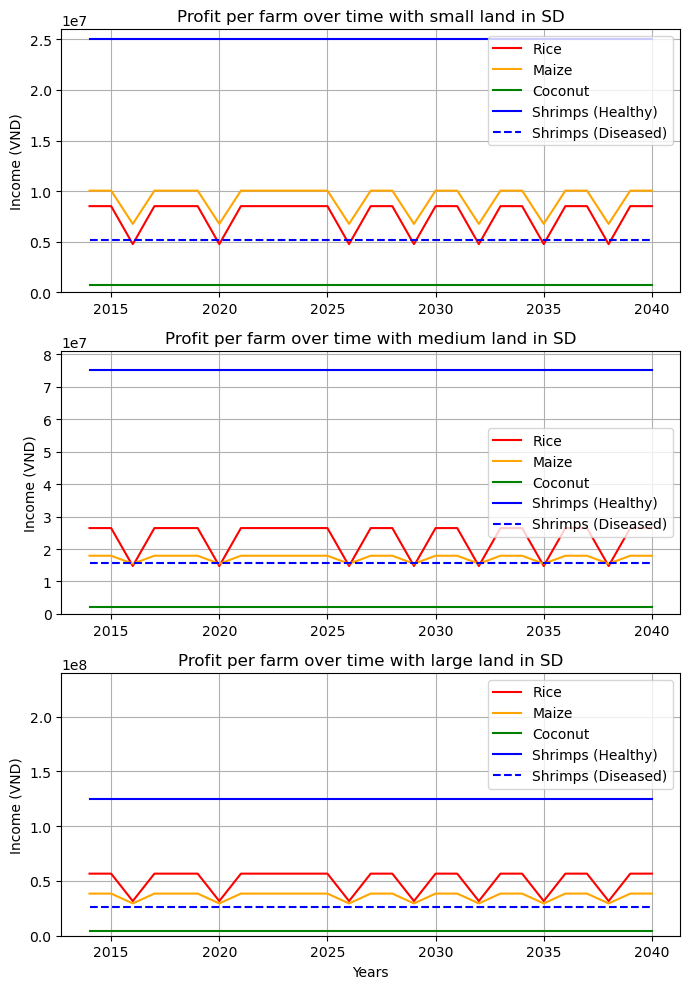

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Zorg dat alle benodigde kolommen numeriek zijn
cols_to_convert = [
    "Profit per shrimp farm[Small,Without disease]",
    "Profit per shrimp farm[Small,With disease]",
    "Profit per shrimp farm[Medium,Without disease]",
    "Profit per shrimp farm[Medium,With disease]",
    "Profit per shrimp farm[Large,Without disease]",
    "Profit per shrimp farm[Large,With disease]",
    '"Profit/farm"[Rice,Small]',
    '"Profit/farm"[Rice,Medium]',
    '"Profit/farm"[Rice,Large]',
    '"Profit/farm"[Coconut,Small]',
    '"Profit/farm"[Coconut,Medium]',
    '"Profit/farm"[Coconut,Large]',
    '"Profit/farm"[Maize,Small]',
    '"Profit/farm"[Maize,Medium]',
    '"Profit/farm"[Maize,Large]',
    "Shrimp farm[Small,Without disease]",
    "Shrimp farm[Small,With disease]",
    "Shrimp farm[Medium,Without disease]",
    "Shrimp farm[Medium,With disease]",
    "Shrimp farm[Large,Without disease]",
    "Shrimp farm[Large,With disease]"
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Plotten
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

# Kleuren
colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

# Kleine landpercelen
axs[0].plot(df['Time'], df['"Profit/farm"[Rice,Small]'], label='Rice', color=colors['Rice'])
axs[0].plot(df['Time'], df['"Profit/farm"[Maize,Small]'], label='Maize', color=colors['Maize'])
axs[0].plot(df['Time'], df['"Profit/farm"[Coconut,Small]'] / 6, label='Coconut', color=colors['Coconut'])
axs[0].plot(df['Time'], df['Profit per shrimp farm[Small,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[0].plot(df['Time'], df['Profit per shrimp farm[Small,With disease]'], label='Shrimps (Diseased)', color=colors['Shrimp'], linestyle='--')
axs[0].set_title('Profit per farm over time with small land in SD')
axs[0].set_ylabel('Income (VND)')
axs[0].set_ylim(0, 2.6e7)
axs[0].legend()
axs[0].grid(True)

# Middelgrote landpercelen
axs[1].plot(df['Time'], df['"Profit/farm"[Rice,Medium]'], label='Rice', color=colors['Rice'])
axs[1].plot(df['Time'], df['"Profit/farm"[Maize,Medium]'], label='Maize', color=colors['Maize'])
axs[1].plot(df['Time'], df['"Profit/farm"[Coconut,Medium]'] / 6, label='Coconut', color=colors['Coconut'])
axs[1].plot(df['Time'], df['Profit per shrimp farm[Medium,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[1].plot(df['Time'], df['Profit per shrimp farm[Medium,With disease]'], label='Shrimps (Diseased)', color=colors['Shrimp'], linestyle='--')
axs[1].set_title('Profit per farm over time with medium land in SD')
axs[1].set_ylabel('Income (VND)')
axs[1].set_ylim(0, 8.1e7)
axs[1].legend()
axs[1].grid(True)

# Grote landpercelen
axs[2].plot(df['Time'], df['"Profit/farm"[Rice,Large]'], label='Rice', color=colors['Rice'])
axs[2].plot(df['Time'], df['"Profit/farm"[Maize,Large]'], label='Maize', color=colors['Maize'])
axs[2].plot(df['Time'], df['"Profit/farm"[Coconut,Large]'] / 6, label='Coconut', color=colors['Coconut'])
axs[2].plot(df['Time'], df['Profit per shrimp farm[Large,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[2].plot(df['Time'], df['Profit per shrimp farm[Large,With disease]'], label='Shrimps (Diseased)', color=colors['Shrimp'], linestyle='--')
axs[2].set_title('Profit per farm over time with large land in SD')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Income (VND)')
axs[2].set_ylim(0, 2.4e8)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


## Profits part 2

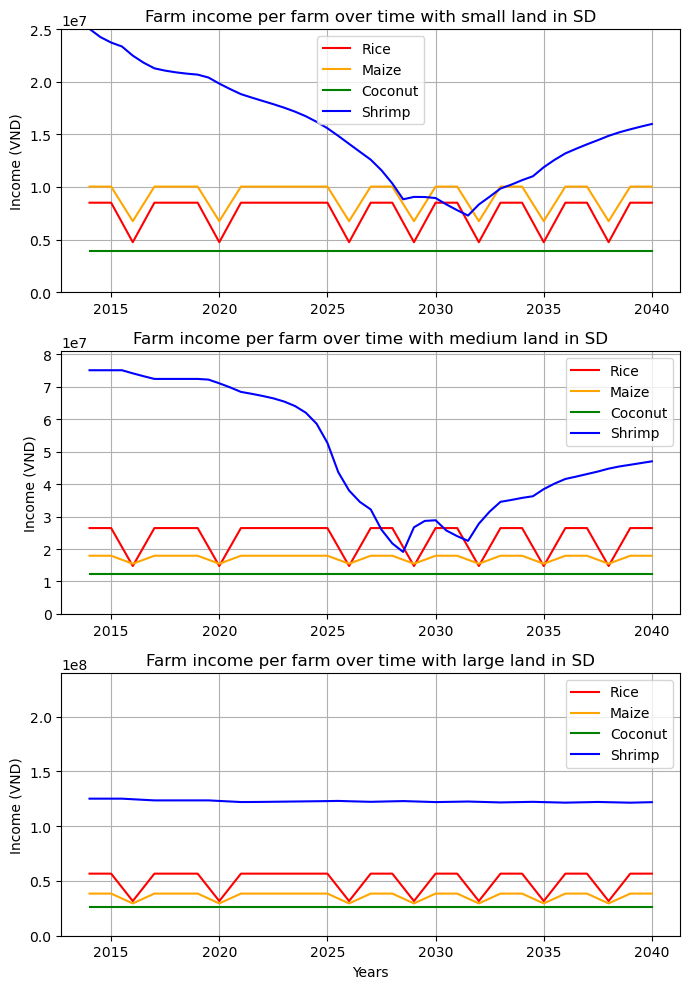

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# Zorg dat alle benodigde kolommen numeriek zijn
cols_to_convert = [
    "Average shrimp farm profits[Small]", 
    "Average shrimp farm profits[Medium]", 
    "Average shrimp farm profits[Large]",
    '"Profit/farm"[Rice,Small]',
    '"Profit/farm"[Rice,Medium]',
    '"Profit/farm"[Rice,Large]',
    '"Profit/farm"[Coconut,Small]',
    '"Profit/farm"[Coconut,Medium]',
    '"Profit/farm"[Coconut,Large]',
    '"Profit/farm"[Maize,Small]',
    '"Profit/farm"[Maize,Medium]',
    '"Profit/farm"[Maize,Large]',
    "Shrimp farm[Small,Without disease]",
    "Shrimp farm[Small,With disease]",
    "Shrimp farm[Medium,Without disease]",
    "Shrimp farm[Medium,With disease]",
    "Shrimp farm[Large,Without disease]",
    "Shrimp farm[Large,With disease]"
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Plotten
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

# Kleuren
colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

# Kleine landpercelen
axs[0].plot(df['Time'], df['"Profit/farm"[Rice,Small]'], label='Rice', color=colors['Rice'])
axs[0].plot(df['Time'], df['"Profit/farm"[Maize,Small]'], label='Maize', color=colors['Maize'])
axs[0].plot(df['Time'], df['"Profit/farm"[Coconut,Small]'] , label='Coconut', color=colors['Coconut'])
axs[0].plot(df['Time'], df['Average shrimp farm profits[Small]'], label='Shrimp', color=colors['Shrimp'])
axs[0].set_title('Farm income per farm over time with small land in SD')
axs[0].set_ylabel('Income (VND)')
axs[0].set_ylim(0, 2.5e7)
axs[0].legend()
axs[0].grid(True)

# Middelgrote landpercelen
axs[1].plot(df['Time'], df['"Profit/farm"[Rice,Medium]'], label='Rice', color=colors['Rice'])
axs[1].plot(df['Time'], df['"Profit/farm"[Maize,Medium]'], label='Maize', color=colors['Maize'])
axs[1].plot(df['Time'], df['"Profit/farm"[Coconut,Medium]'], label='Coconut', color=colors['Coconut'])
axs[1].plot(df['Time'], df['Average shrimp farm profits[Medium]'], label='Shrimp', color=colors['Shrimp'])
axs[1].set_title('Farm income per farm over time with medium land in SD')
axs[1].set_ylabel('Income (VND)')
axs[1].set_ylim(0, 8.1e7)
axs[1].legend()
axs[1].grid(True)

# Grote landpercelen
axs[2].plot(df['Time'], df['"Profit/farm"[Rice,Large]'], label='Rice', color=colors['Rice'])
axs[2].plot(df['Time'], df['"Profit/farm"[Maize,Large]'], label='Maize', color=colors['Maize'])
axs[2].plot(df['Time'], df['"Profit/farm"[Coconut,Large]'] , label='Coconut', color=colors['Coconut'])
axs[2].plot(df['Time'], df['Average shrimp farm profits[Large]'], label='Shrimp', color=colors['Shrimp'])
axs[2].set_title('Farm income per farm over time with large land in SD')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Income (VND)')
axs[2].set_ylim(0, 2.4e8)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


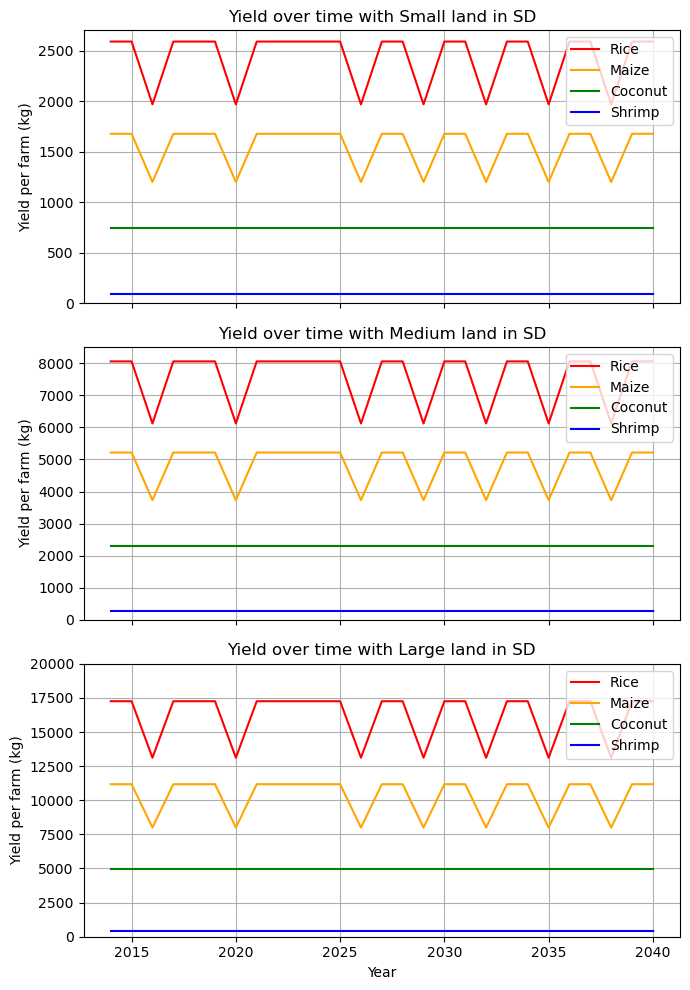

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Zet de relevante kolommen om naar numeriek
yield_cols = [
    '"Crop yield/farm"[Rice,Small]', '"Crop yield/farm"[Rice,Medium]', '"Crop yield/farm"[Rice,Large]',
    '"Crop yield/farm"[Coconut,Small]', '"Crop yield/farm"[Coconut,Medium]', '"Crop yield/farm"[Coconut,Large]',
    '"Crop yield/farm"[Maize,Small]', '"Crop yield/farm"[Maize,Medium]', '"Crop yield/farm"[Maize,Large]',
    '"Shrimp yield/farm"[Small,Without disease]', '"Shrimp yield/farm"[Small,With disease]',
    '"Shrimp yield/farm"[Medium,Without disease]', '"Shrimp yield/farm"[Medium,With disease]',
    '"Shrimp yield/farm"[Large,Without disease]', '"Shrimp yield/farm"[Large,With disease]'
]

for col in yield_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Kleuren
colors = {
    'Rice': 'red',
    'Coconut': 'green',
    'Maize': 'orange',
    'Shrimp': 'blue'
}

# Plot
fig, axs = plt.subplots(3, 1, figsize=(7, 10), sharex=True)

# Small
axs[0].plot(df['Time'], df['"Crop yield/farm"[Rice,Small]'], label='Rice', color=colors['Rice'])
axs[0].plot(df['Time'], df['"Crop yield/farm"[Maize,Small]'], label='Maize', color=colors['Maize'])
axs[0].plot(df['Time'], df['"Crop yield/farm"[Coconut,Small]'] , label='Coconut', color=colors['Coconut'])
axs[0].plot(df['Time'],
            df['"Shrimp yield/farm"[Small,Without disease]'] + df['"Shrimp yield/farm"[Small,With disease]'],
            label='Shrimp', color=colors['Shrimp'])
axs[0].set_title('Yield over time with Small land in SD')
axs[0].set_ylabel('Yield per farm (kg)')
axs[0].set_ylim(0, 2700)
axs[0].legend()
axs[0].grid(True)

# Medium
axs[1].plot(df['Time'], df['"Crop yield/farm"[Rice,Medium]'], label='Rice', color=colors['Rice'])
axs[1].plot(df['Time'], df['"Crop yield/farm"[Maize,Medium]'], label='Maize', color=colors['Maize'])
axs[1].plot(df['Time'], df['"Crop yield/farm"[Coconut,Medium]'] , label='Coconut', color=colors['Coconut'])
axs[1].plot(df['Time'],
            df['"Shrimp yield/farm"[Medium,Without disease]'] + df['"Shrimp yield/farm"[Medium,With disease]'],
            label='Shrimp', color=colors['Shrimp'])
axs[1].set_title('Yield over time with Medium land in SD')
axs[1].set_ylabel('Yield per farm (kg)')
axs[1].set_ylim(0, 8500)
axs[1].legend()
axs[1].grid(True)

# Large
axs[2].plot(df['Time'], df['"Crop yield/farm"[Rice,Large]'], label='Rice', color=colors['Rice'])
axs[2].plot(df['Time'], df['"Crop yield/farm"[Maize,Large]'], label='Maize', color=colors['Maize'])
axs[2].plot(df['Time'], df['"Crop yield/farm"[Coconut,Large]'] , label='Coconut', color=colors['Coconut'])
axs[2].plot(df['Time'],
            df['"Shrimp yield/farm"[Large,Without disease]'] + df['"Shrimp yield/farm"[Large,With disease]'],
            label='Shrimp', color=colors['Shrimp'])
axs[2].set_title('Yield over time with Large land in SD')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Yield per farm (kg)')
axs[2].set_ylim(0, 20000)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


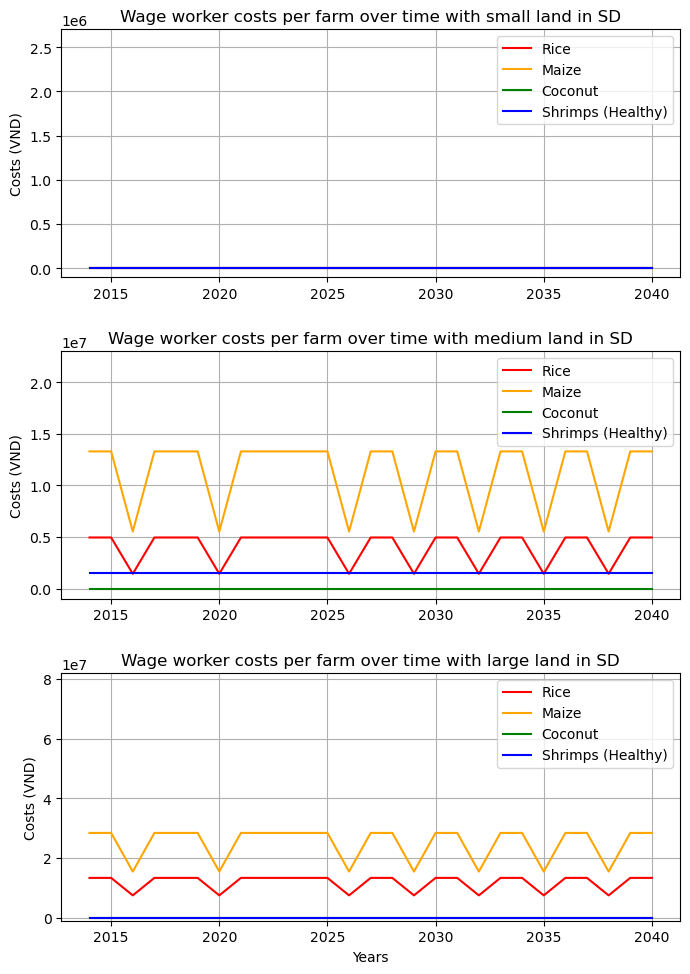

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

# Voeg wage worker kosten kolommen toe aan de lijst om te converteren
wage_cols = [
    "Wage worker costs per farm[Rice,Small]",
    "Wage worker costs per farm[Rice,Medium]",
    "Wage worker costs per farm[Rice,Large]",
    "Wage worker costs per farm[Coconut,Small]",
    "Wage worker costs per farm[Coconut,Medium]",
    "Wage worker costs per farm[Coconut,Large]",
    "Wage worker costs per farm[Maize,Small]",
    "Wage worker costs per farm[Maize,Medium]",
    "Wage worker costs per farm[Maize,Large]",
    "Wage worker costs per shrimp farm[Small,Without disease]",
    "Wage worker costs per shrimp farm[Medium,Without disease]",
    "Wage worker costs per shrimp farm[Large,Without disease]"
]

for col in wage_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Plotten wage worker costs
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

colors = {
    'Rice': 'red',
    'Maize': 'orange',
    'Coconut': 'green',
    'Shrimp': 'blue'
}

# Klein
axs[0].plot(df['Time'], df['Wage worker costs per farm[Rice,Small]'], label='Rice', color=colors['Rice'])
axs[0].plot(df['Time'], df['Wage worker costs per farm[Maize,Small]'], label='Maize', color=colors['Maize'])
axs[0].plot(df['Time'], df['Wage worker costs per farm[Coconut,Small]'] / 6, label='Coconut', color=colors['Coconut'])
axs[0].plot(df['Time'], df['Wage worker costs per shrimp farm[Small,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[0].set_title('Wage worker costs per farm over time with small land in SD')
axs[0].set_ylabel('Costs (VND)')
axs[0].set_ylim(-0.1e6, 2.7e6)
axs[0].legend()
axs[0].grid(True)

# Medium
axs[1].plot(df['Time'], df['Wage worker costs per farm[Rice,Medium]'], label='Rice', color=colors['Rice'])
axs[1].plot(df['Time'], df['Wage worker costs per farm[Maize,Medium]'], label='Maize', color=colors['Maize'])
axs[1].plot(df['Time'], df['Wage worker costs per farm[Coconut,Medium]'] / 6, label='Coconut', color=colors['Coconut'])
axs[1].plot(df['Time'], df['Wage worker costs per shrimp farm[Medium,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[1].set_title('Wage worker costs per farm over time with medium land in SD')
axs[1].set_ylabel('Costs (VND)')
axs[1].set_ylim(-0.1e7, 2.3e7)
axs[1].legend()
axs[1].grid(True)

# Large
axs[2].plot(df['Time'], df['Wage worker costs per farm[Rice,Large]'], label='Rice', color=colors['Rice'])
axs[2].plot(df['Time'], df['Wage worker costs per farm[Maize,Large]'], label='Maize', color=colors['Maize'])
axs[2].plot(df['Time'], df['Wage worker costs per farm[Coconut,Large]'] / 6, label='Coconut', color=colors['Coconut'])
axs[2].plot(df['Time'], df['Wage worker costs per shrimp farm[Large,Without disease]'], label='Shrimps (Healthy)', color=colors['Shrimp'], linestyle='-')
axs[2].set_title('Wage worker costs per farm over time with large land in SD')
axs[2].set_xlabel('Years')
axs[2].set_ylabel('Costs (VND)')
axs[2].set_ylim(-0.1e7, 8.2e7)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
